# Crypto Clustering

In [22]:
# Import statements

import pandas as pd
import hvplot.pandas
from path import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [2]:
df = pd.read_csv('crypto_data.csv',index_col=[0])
df.head(5)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
# To filter for currencies that are currently being traded

df = df[df.IsTrading != False]
print(df.shape)
df.head()

(1144, 6)


,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [4]:
# To drop IsTrading column from the dataframe

df = df.drop('IsTrading', axis = 1)
df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [5]:
# To remove all rows that have at least one null value

df = df.dropna()
print(df.shape)
df.head()

(685, 5)


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000


In [6]:
# To filter  cryptocurrencies that have been mined. That is, the total coins mined should be greater than zero.

df = df[df.TotalCoinsMined >0]
print(df.shape)
df.head()


(532, 5)


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0


In [7]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm.
df = df.drop(columns="CoinName",axis = 1)
print(df.shape)
df.head()

(532, 4)


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0


In [8]:
# Use get_dummies() to create variables for text features

X = pd.get_dummies(df, columns=["Algorithm", "ProofType"], drop_first=True)
print(X.shape)
X.head()

(532, 96)


,TotalCoinsMined,TotalCoinSupply,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Scaling the data

scalar = StandardScaler()
cryto_scale = scalar.fit_transform(X)
print(cryto_scale[0:3])

[[-0.11710817 -0.1528703  -0.0433963  -0.0433963  -0.06142951 -0.07530656
  -0.0433963  -0.06142951 -0.06142951 -0.0433963  -0.0433963  -0.19245009
  -0.06142951 -0.09740465 -0.0433963  -0.11547005 -0.07530656 -0.0433963
  -0.0433963  -0.15191091 -0.0433963  -0.13118084 -0.0433963  -0.0433963
  -0.08703883 -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.06142951
  -0.0433963  -0.08703883 -0.08703883 -0.08703883 -0.0433963  -0.13118084
  -0.13840913 -0.13840913 -0.0433963  -0.06142951 -0.0433963  -0.07530656
  -0.18168574 -0.0433963  -0.0433963  -0.0433963  -0.07530656 -0.15826614
  -0.31491833 -0.0433963  -0.08703883 -0.07530656 -0.06142951  1.38675049
  -0.0433963  -0.0433963  -0.06142951 -0.0433963  -0.0433963  -0.0433963
  -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.39879994
  -0.0433963  -0.18168574 -0.0433963  -0.08703883 -0.08703883 -0.10680283
  -0.13118084 -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.07530656
  -0.43911856 -0.0433963  -0.06142951 -0.

# Dimensionality Reduction

## PCA

In [19]:
# Using PCA to reduce dimension 
pca = PCA(n_components=0.90)
crypto_pca = pca.fit_transform(cryto_scale)
print(crypto_pca.shape)
crypto_pca[0:3]


(532, 74)


array([[-3.35913620e-01,  1.04340531e+00, -5.37409264e-01,
         1.34711871e-03, -4.36493220e-14,  3.24961285e-14,
        -1.35783468e-02, -1.32993992e+00, -5.31061674e-02,
        -3.33927185e-01,  1.63478637e-01,  1.90011198e-01,
        -4.69808782e-01,  9.79680258e-01,  1.48510016e-01,
         1.34968984e-01,  1.27406845e-01,  1.24350680e-02,
         2.03267253e-02, -2.56456988e-02, -3.05342530e-03,
        -2.44769745e-03,  4.11431511e-03,  2.29351791e-02,
        -6.18287037e-03,  1.64122619e-03,  1.98653191e-04,
        -5.87369399e-14,  1.68546504e-14, -1.28584839e-05,
         1.83183663e-03, -2.80996579e-03,  1.78676906e-03,
        -2.57774400e-03, -7.47234356e-02, -1.90781731e-02,
         1.57330402e-02, -3.89142471e-04,  1.87240347e-03,
         6.59938598e-04,  4.03030728e-15,  2.04631258e-14,
         1.12414363e-03,  5.51147117e-04,  1.14911307e-03,
        -2.18863966e-03,  6.17091303e-03, -7.46332166e-04,
        -9.53179271e-16, -6.37246143e-15,  2.28707157e-1

In [18]:

# Transform PCA data to a DataFrame
pca_df = pd.DataFrame(
    data=crypto_pca, columns=["pca_1", "pca_2", "pca_3","pca_4", "pca_5", "pca_6","pca_7", "pca_8", "pca_9","pca_10", 
                              "pca_11", "pca_12", "pca_13","pca_14", "pca_15", "pca_16","pca_17", "pca_18", "pca_19","pca_20",
                              "pca_21", "pca_22", "pca_23","pca_24", "pca_25", "pca_26","pca_27", "pca_28", "pca_29","pca_30",
                              "pca_31", "pca_32", "pca_33","pca_34", "pca_35", "pca_36","pca_37", "pca_38", "pca_39","pca_40",
                              "pca_41", "pca_42", "pca_43","pca_44", "pca_45", "pca_46","pca_47", "pca_48", "pca_49","pca_50",
                              "pca_51", "pca_52", "pca_53","pca_54", "pca_55", "pca_56","pca_57", "pca_58", "pca_59","pca_60",
                              "pca_61", "pca_62", "pca_63","pca_64", "pca_65", "pca_66","pca_67", "pca_68", "pca_69","pca_70",
                             "pca_71", "pca_72", "pca_73","pca_74"]
)
pca_df.head()

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,...,pca_65,pca_66,pca_67,pca_68,pca_69,pca_70,pca_71,pca_72,pca_73,pca_74
0,-0.335914,1.043405,-0.537409,0.001347,-4.364932e-14,3.249613e-14,-0.013578,-1.329940,-0.053106,-0.333927,...,2.111954e-16,4.990967e-17,-1.589248e-18,-8.273444e-16,-2.107261e-15,-6.460354e-15,-2.188289e-15,3.966798e-15,3.941419e-16,4.120899e-15
1,-0.319249,1.043547,-0.537804,0.001337,-4.370949e-14,3.260245e-14,-0.014190,-1.332705,-0.057966,-0.330612,...,2.395980e-16,1.304518e-16,-1.085666e-16,-1.051750e-15,-2.228620e-15,-6.545091e-15,-2.226101e-15,3.766734e-15,2.493371e-16,3.552016e-15
2,2.304716,1.669996,-0.624077,0.004420,-6.792539e-14,4.166980e-14,-0.062312,-1.554093,-0.945690,0.375087,...,-1.174593e-14,8.191332e-15,-7.242621e-14,-3.341046e-14,4.608958e-14,1.395859e-14,1.547672e-14,1.902873e-15,-6.706214e-14,-7.840135e-14
3,-0.145455,-1.323925,0.177429,-0.001167,1.751217e-14,-1.366167e-14,0.000326,0.283548,0.252906,-0.079820,...,-3.433881e-15,-4.638376e-15,-8.058235e-15,6.148385e-16,1.542413e-14,4.311477e-15,5.914555e-15,5.953485e-15,-2.661593e-14,-2.021233e-14
4,-0.151951,-2.044976,0.364208,-0.001636,3.208023e-14,-1.805419e-14,0.032350,0.524429,0.191031,0.074021,...,-1.013016e-14,-1.339723e-13,1.358793e-13,6.926343e-14,5.786080e-14,-1.583295e-14,1.617152e-13,1.314345e-13,-1.675169e-13,-6.900679e-14


In [20]:
# Fetch the explained variance.
pca.explained_variance_ratio_

array([0.02851314, 0.02183228, 0.02093007, 0.02087258, 0.02087257,
       0.02087257, 0.02085124, 0.01910435, 0.0179288 , 0.01777379,
       0.01662938, 0.01629408, 0.01583495, 0.01464966, 0.0134856 ,
       0.01262337, 0.01231377, 0.01127287, 0.01093674, 0.01070932,
       0.01062572, 0.01060732, 0.01059359, 0.0105697 , 0.01055562,
       0.01051051, 0.01049655, 0.01049558, 0.01049558, 0.01049558,
       0.01049381, 0.01048438, 0.01047714, 0.01047581, 0.01047329,
       0.01047115, 0.01046928, 0.01046411, 0.01046265, 0.01045618,
       0.01045597, 0.01045597, 0.01045525, 0.01045351, 0.01044982,
       0.01044805, 0.0104431 , 0.01043743, 0.01043628, 0.01043628,
       0.01043628, 0.01043628, 0.01043628, 0.01043628, 0.01043628,
       0.01043628, 0.01043628, 0.01043628, 0.01043628, 0.01043628,
       0.01043628, 0.01043628, 0.01043628, 0.01043628, 0.01043628,
       0.01043628, 0.01043628, 0.01043628, 0.01043628, 0.01043628,
       0.01043628, 0.01043628, 0.01043628, 0.01043628])

## T-SNE

In [36]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=155)

In [37]:
# Reduce dimensions
tsne_features = tsne.fit_transform(crypto_pca)
tsne_features.shape

(532, 2)

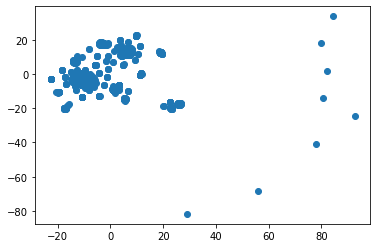

In [38]:
# Visualize the clusters
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()